## Module 3 Project: Automatic lithoclassification of unconsolidated sediments 

## 1. Introduction


In the frame of Sebastian Schaller's PhD project, a large data set of several sedimentological-, geophysical-, and chemical logs (here, logs can be thought of as 'features' in a dataset) were collected from a 252-meter-long drill core. 
The goal is to analyze the data and: 
   - Compare the visual-based classification of the sediments (classic geological route) with a semi-automated data-based clustering of the logs (using clustering techniques or PCA)
   - Another goal would be to develop a log-based way to classify unconsolidated quaternary sediments. This would have several advantages:
       - Core drilling is expensive ~1000 sFr/m
       - Takes a lot of time to analyze and describe -> 1-2 years from drilling to a proper profile
       - A combination of much cheaper destructive drilling with wireline logging would obtain the same logs but without keeping the core intact. This dataset could then be ran through the clustering model to reconstruct the stratigraphy 
       
**Module 2**

During the Module 2 project, and as a first step, the three MSCL-Logs (wet bulk density, magnetic susceptibility, natural gamma radiation) are compared since they represent the most complete data set and have a very close measurement spacing of 0.5 cm. Further, they are measured directly at the cores and, therefore, are directly comparable with the visual core description. Thus, the visual-based classification can be compared with the data-based clustering, and the impact of the different logs can be estimated. 

***M2 Data Analysis***

- Data collection
    - MSCL-core-log data (collected during my PhD-studies)
- Description of the data (for each individual log)
    - Distribution of quality and lithology
    - Calculate mean and std
    - Log data is normally distributed, -> no trend in/homogeneous data set (0-hypothesis-1)
        - Test normality of whole distribution (D`Agostino-Pearson-Test)
        - Test normality of individual sub-datasets (lithological groups) (D`Agostino-Pearson-Test)
    - Distribution of the sub-datasets (based on visible core descriptions) is randomly distributed (0-hypothesis-2)
        - Test similarities of litho groups of each log (Kruskal-Wallis test) 
        - pair-wise comparison of each possible combination of the litho groups (Mannä-Whitney-U test)
    - Choose good plots
    
***M2 Conclusions*** 
- Distribution of log data:
    - Log data is not normally distributed -> q-q plots and D`Agostino-Pearson-Test
    - Sub-data sets are also not normally distributed -> q-q plots and D`Agostino-Pearson-Test
- Distribution of litho groups inside the whole log data:
    - Is not normally distributed, makes geological sense, shows no overlap -> Kruskal-Wallis test and Mann-Whitney-U test
- Judging similarities between the visual core description-based lithological classification and the scatter plots.
    - clustering is visible, backed by geological knowledge
- Qualitatively judging the value/impact of the analyzed logs on the data clustering -> input for the main project: developing a (geo)physical and chemical borehole/drillcore log-based classification system for unconsolidated quaternary sediments.
    - Qualitatively: Density and Natural gamma log  clearly influence the clustering, whereas magnetic susceptibility does not have much impact on clustering by this type of sediments (heterogeneous, reworked, ...)
    - Possible options for other logs for combination: 
        - Resistivity
        - Porosity

**Module 3 Project**


**Definition of significant**

P-values below 0.001 ar considered as  unlikely enough to reject the 0-hypothesis. 

![screenshot_main_profile_reviewed.JPG](/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/images/screenshot_main_profile_reviewed.JPG)

Lithological and petrophysical data versus depth. Columns from left to right: depth-scale [mtd], stratigraphic units (labeled with
A1–A5, B, and C; WTDwater table; LPBDlowest Pleistocene base level), lithotypes, dominant grain size with indicated main lithotypes,
symbols of prominent observations, wet bulk density (gcm^-3), magnetic susceptibility (SI10^-5), natural gamma radiation (CPS,
counts per second), water content with indicated standard deviation (wt %), undrained uniaxial compressive strength (q0u
) (kPa), undrained
shear strength (c0u
) (kPa), organic matter content (wt %), carbonate content (wt %), and the recovery. Main lithotypes are indicated as semitransparent
color codes over the plot’s entire width.

Source: Schaller et al., 2023 (submitted)

# 2. Dataset description and Setup

## 2.1 Setting up the data

In [3]:
# Importing libraries and modules

import os #importing OperationSystem module
import pandas as pd # Pandas

# Machine Learning
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance
#!pip install tensorflow
import tensorflow as tf
#!pip install dtreeviz==1.4.0
from dtreeviz.trees import dtreeviz # remember to load the package

# Visualization
from matplotlib import pyplot as plt
#!pip install plotly
import plotly.express as px
#!pip install seaborn
import seaborn as sns
sns.set()
import mpltern# used for ternary plots, no standard python library (see: https://mpltern.readthedocs.io/en/latest/ )
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

# Numeric and statistical libraries
import numpy as np #numpy
import scipy #statistic module
from scipy import stats#statistics
import statsmodels.api as sm#statistics

# Others
from time import time as timer
import tarfile

2023-11-22 01:17:24.578525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Options

control = True # if set to True, control values from the data processing will be printed

# Setting the working directory to the directory (raw string input) where the dataset is located
abs_path_log = r'/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/Data'

os.chdir(abs_path_log) # setting working directory to the location of the mscl-log
os.getcwd() # getting the current working directory, to check if I am working in the right directory

'/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/Data'

In [5]:
# Loading and setting up the dataset.

file_name1 = '5068_2_A_Combined_MSCL_data_filtered_rescaled_20230601_ss.csv' # file name of mscl_data
df_mscl = pd.read_csv(file_name1, header = 0) # loading the data as a pandas data frame, with the original headers
df_mscl.head()

,Composite_depth [cm],Rescaled SECT_DEPTH [cm],SB_DEPTH [m],SECT_NUM_MC,SECT_DEPTH [cm],CT [cm],PWAmp,PWAmp (pw and dens filtred),PWVel [m/s],PWVel [m/s] (pw and dens filtred),...,Imp,FP,Nat_Gamma [cps],K [%],U [ppm],Th [ppm],core_quality,litho types,mes_ID,section_ID
0,0.000000,0.000000,0.003,1.0,0.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2,5068_2_A_20210526_1,5068_2_A_001_1
1,0.582751,0.582751,0.008,1.0,0.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,2,5068_2_A_20210526_1,5068_2_A_001_1
2,1.165501,1.165501,0.013,1.0,1.3,10.4,0.0001,NaN,2211.354,NaN,...,1307.078,1.2523,10.6644,-2.9620,-22.1046,72.1170,0,2,5068_2_A_20210526_1,5068_2_A_001_1
3,1.748252,1.748252,0.018,1.0,1.8,10.4,0.0000,NaN,8630.704,NaN,...,6438.965,1.1624,9.4644,-1.6882,-24.1719,106.0823,0,2,5068_2_A_20210526_1,5068_2_A_001_1
4,2.331002,2.331002,0.023,1.0,2.3,10.4,0.0000,NaN,20432.220,NaN,...,19468.360,1.0424,19.0644,-7.6081,-66.6650,158.7609,0,2,5068_2_A_20210526_1,5068_2_A_001_1


In [6]:
# Summary of the loaded sediment core drill log dataset

# Extracting column headers and converting them into a Pandas Series
header_data = pd.Series(df_mscl.columns)

# Selecting specific columns of interest: Filtered and UnFiltered density, magnetic logs,
# natural gamma log, data quality classification, and lithoclast classification
used_columns_indices = [10, 13, 16, 20, 21]
header_list_df_reduced = list(header_data[used_columns_indices])

# Creating a new DataFrame with only the selected data columns
df_reduced = df_mscl[header_list_df_reduced]

# Rounding the data to a reasonable precision:
# - Density rounded to 3 significant digits
# - Magnetic and gamma logs rounded to 1 significant digit

# Copying the DataFrame to preserve the original and overwrite with the rounded values
df_reduced = df_reduced.copy()

# Rounding specific columns to the desired precision
df_reduced.iloc[:, 0] = df_reduced[header_list_df_reduced[0]].round(decimals=3).copy()  # Density data
df_reduced.iloc[:, 1:] = df_reduced[header_list_df_reduced[1:]].round(decimals=1).copy()  # Magsus and gamma data

# Displaying the first few rows of the modified DataFrame
df_reduced.head()

,Dens [g/cc],Mag_Sus BS_cor [SI x 10^-5],Nat_Gamma [cps],core_quality,litho types
0,NaN,NaN,NaN,4,2
1,NaN,NaN,NaN,4,2
2,0.591,13.3,10.7,0,2
3,0.746,14.2,9.5,0,2
4,0.953,14.9,19.1,0,2


In [7]:
# Reducing the litho class range to the four main types: D = diamicts (1 <= litho type < 7), G = Gravel (7 <= litho type < 11), S = Sand (11 <= litho type < 19), F = fines (clay +silt; >= 19)

# Assign the value 19 (Fines) to any element in the specified column that is greater than or equal to 19.
df_reduced[header_list_df_reduced[-1]] = np.where(df_reduced[header_list_df_reduced[-1]]>= 19,
                                                 19,df_reduced[header_list_df_reduced[-1]])

# Assign the value 11 (Sand) to any element in the specified column that is less than 19 but greater than or equal to 11.
df_reduced[header_list_df_reduced[-1]] = np.where((df_reduced[header_list_df_reduced[-1]]<19)&
                                                 (df_reduced[header_list_df_reduced[-1]]>= 11),
                                                 11,df_reduced[header_list_df_reduced[-1]])

# Assign the value 7 (Gravel) to any element in the specified column that is less than 19 but greater than or equal to 11.
df_reduced[header_list_df_reduced[-1]] = np.where((df_reduced[header_list_df_reduced[-1]]<11)&
                                                 (df_reduced[header_list_df_reduced[-1]]>= 7),
                                                 7,df_reduced[header_list_df_reduced[-1]])

# Assign the value 1 (Diamicts) to any element in the specified column that is less than 7.
df_reduced[header_list_df_reduced[-1]] = np.where(df_reduced[header_list_df_reduced[-1]]<7,
                                                 1,df_reduced[header_list_df_reduced[-1]])

df_reduced.head()
#df_reduced['core_quality'].max()

,Dens [g/cc],Mag_Sus BS_cor [SI x 10^-5],Nat_Gamma [cps],core_quality,litho types
0,NaN,NaN,NaN,4,1
1,NaN,NaN,NaN,4,1
2,0.591,13.3,10.7,0,1
3,0.746,14.2,9.5,0,1
4,0.953,14.9,19.1,0,1


In [8]:
# Excluding the heavily disturbed data points (-> core quality class >2) and dropping any remaning NaNs (to be safe)

df_reduced_clean = df_reduced[df_reduced[header_list_df_reduced[-2]]<2].copy().dropna()
df_reduced_clean

,Dens [g/cc],Mag_Sus BS_cor [SI x 10^-5],Nat_Gamma [cps],core_quality,litho types
2,0.591,13.3,10.7,0,1
3,0.746,14.2,9.5,0,1
4,0.953,14.9,19.1,0,1
5,1.053,15.3,19.3,0,1
6,1.135,15.5,26.9,0,1
...,...,...,...,...,...
47583,2.228,158.1,13.5,0,1
47584,2.225,166.9,30.3,0,1
47585,2.242,165.7,23.3,0,1
47586,2.280,159.6,18.9,0,1


In [9]:
# Control prints to see if everything worked out

if control == True:
    print('Information on complete data set: ')
    print(df_mscl.info()) # prints info of complete data set
    print()

    print('Information on reduced data set:')
    print(df_reduced.info()) # info of reduced data frame
    print('First 5 rows of the reduced data set: ')
    print(df_reduced.head())
    print()

    print('Information on reduced and cleaned data set: ')
    print(df_reduced_clean.info())   
    print('First 5 rows of the reduced and cleaned data set: ')
    print(df_reduced_clean.head())
    print()

Information on complete data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Composite_depth [cm]               47591 non-null  float64
 1   Rescaled SECT_DEPTH [cm]           47591 non-null  float64
 2   SB_DEPTH [m]                       47591 non-null  float64
 3   SECT_NUM_MC                        47591 non-null  float64
 4   SECT_DEPTH [cm]                    47591 non-null  float64
 5   CT [cm]                            46350 non-null  float64
 6   PWAmp                              46350 non-null  float64
 7   PWAmp (pw and dens filtred)        3647 non-null   float64
 8   PWVel [m/s]                        46350 non-null  float64
 9   PWVel [m/s] (pw and dens filtred)  3647 non-null   float64
 10  Dens [g/cc]                        46350 non-null  float64
 11  Dens [g/cc] (pw and

## 3. Comparison of the datasets

### 3.1 Setting up the data

In [12]:
#Setting up the data for the scatter plots
#Filtering the dta set (filtering for values, quality clas and removing NaNs)

#excluding all rows, where density is <1.5
df_reduced_filtered_dens = df_reduced[df_reduced[header_list_df_reduced[0]]>=1.5].copy()
#excluding all rows, wherre magsus is >100
df_reduced_filtered_dens_magsus = df_reduced_filtered_dens[df_reduced_filtered_dens[header_list_df_reduced[1]]<=100].copy()
#excluding all rows, wherre natgamma is <0
df_reduced_filtered_dens_magsus_gamma = df_reduced_filtered_dens_magsus[df_reduced_filtered_dens_magsus[header_list_df_reduced[2]]>=0].copy()
#excluding all disturbed data, Quality class 2 or bigger
df_reduced_filtered_cq =  df_reduced_filtered_dens_magsus_gamma[df_reduced_filtered_dens_magsus_gamma[header_list_df_reduced[-2]]<2].copy()
#dropping all rows where there are any remaning NaNs left 
df_reduced_clean_scatter = df_reduced_filtered_cq.dropna().copy()

#creating and adding the normalised data to the original data frame, (x_norm = x-x_min/x_max-x_mib)
logs_min =pd.DataFrame(df_reduced_clean_scatter[header_list_df_reduced[0:3]].describe().loc[['min']])#minimal values
logs_max= pd.DataFrame(df_reduced_clean_scatter[header_list_df_reduced[0:3]].describe().loc[['max']])#maximal values
logs_delta = logs_max.iloc[0] - logs_min.iloc[0]#delta

#adding the normalised data as a new columne to the data frame
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(dens_norm=(
    df_reduced_clean_scatter[header_list_df_reduced[0]]-logs_min.iloc[0,0])/logs_delta.iloc[0])#normalised dens
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(magsus_norm=(
    df_reduced_clean_scatter[header_list_df_reduced[1]]-logs_min.iloc[0,1])/logs_delta.iloc[1])#normalised magsus
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(gamma_norm=(
    df_reduced_clean_scatter[header_list_df_reduced[2]]-logs_min.iloc[0,2])/logs_delta.iloc[2])#normalised natural gamma radiation

#masking and seperating the data into the individual sub data sets, 
#extracting the statistical summary of the data for later use
#Setting upp needed input
litho_list = [1,7,11,19]#list with numerical code of main litho types (1=diamict, 7=gravel, 11=sand, 19= fines)
#prelocating the later extraced/created values
#for output of pd.describe()
summary_list = [0]*len(litho_list)#not normalised
summary_list_norm = [0]*len(litho_list)#normalised to 1
#masked data sets, sub data sets
data_log = [0]*len(litho_list)#not normalised
data_log_norm = [0]*len(litho_list)#normalised to 1

#for-loop to mask over the four main lithogroups and extract the subdata sets and the statistical summary for later use (pd.describe())
for i in range(len(litho_list)): 
    #renaming the data frame for easier handling
    all_data = df_reduced_clean_scatter
    #masking over the four main litho types, 
    all_data_f = all_data[df_reduced_clean_scatter[header_list_df_reduced[-1]] == litho_list[i]]
    
    #extracting the log data (Dens, Magsus, Natgamma)
    data = all_data_f.iloc[:,0:3]#not normalised
    data_norm = all_data_f.iloc[:,5:]#normalised 
    #adding the data to the coresponding lsit  
    data_log[i]= data#not normalised  
    data_log_norm[i] = data_norm#normalised                               
    #adding the statisitc output summary of the masked subdata set
    summary_list[i] = pd.DataFrame(data.describe()).round(2)#not normalised  
    summary_list_norm[i] = pd.DataFrame(data_norm.describe()).round(2)#normalised


if control == True:  
    #checking the impacts of the different filters
    print(f'Unfiltered: {df_reduced.info()}')
    print()

    print(f'Density filtered: {df_reduced_filtered_dens.info()}')
    print()

    print(f'magnetic susceptibility filtered: {df_reduced_filtered_dens_magsus.info()}')
    print()

    print(f'natural gamma radiation filtered: {df_reduced_filtered_dens_magsus_gamma.info()}')
    print()

    print(f'Core quality class filtered: {df_reduced_filtered_cq.info()}')
    print()

    print(f'NaN filtered: {df_reduced_filtered_cq.info()}')
    print()

    print(f'Cleaned dataset:{df_reduced_clean_scatter.info()}')
    print()

    print(f'summary list:{summary_list}')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dens [g/cc]                  46350 non-null  float64
 1   Mag_Sus BS_cor [SI x 10^-5]  46350 non-null  float64
 2   Nat_Gamma [cps]              46350 non-null  float64
 3   core_quality                 47591 non-null  int64  
 4   litho types                  47591 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB
Unfiltered: None

<class 'pandas.core.frame.DataFrame'>
Index: 45388 entries, 23 to 47587
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dens [g/cc]                  45388 non-null  float64
 1   Mag_Sus BS_cor [SI x 10^-5]  45388 non-null  float64
 2   Nat_Gamma [cps]              45388 non-null  float64
 3   core_quality       

### Test only

/Users/pbecerra/.pyenv/versions/anaconda3-2023.07-2/envs/CAS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


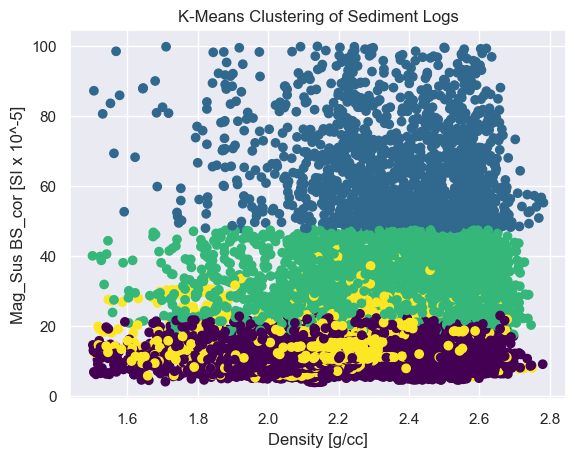

In [16]:
from sklearn.cluster import KMeans

# Assuming df_normalized is your DataFrame with standardized numerical columns

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 4

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_reduced_clean_scatter['cluster_label'] = kmeans.fit_predict(df_reduced_clean_scatter[['Dens [g/cc]', 'Mag_Sus BS_cor [SI x 10^-5]', 'Nat_Gamma [cps]']])

# Visualization
plt.scatter(df_reduced_clean_scatter['Dens [g/cc]'], df_reduced_clean_scatter['Mag_Sus BS_cor [SI x 10^-5]'], c=df_reduced_clean_scatter['cluster_label'], cmap='viridis')
plt.xlabel('Density [g/cc]')
plt.ylabel('Mag_Sus BS_cor [SI x 10^-5]')
plt.title('K-Means Clustering of Sediment Logs')
plt.show()
